# SIR model Applied on KARATE CLUB graph

The SIR model was introduced in 1927 by Kermack [1].

In this model, during the course of an epidemics, a node is allowed to change its status from Susceptible (S) to Infected (I), then to Removed (R).

The model is instantiated on a graph having a non-empty set of infected nodes.

SIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected with probability beta, than it can be switch to removed with probability gamma (the only transition allowed are S→I→R).



In [4]:
!pip install networkx matplotlib fa2l ndlib tqdm

     |████████████████████████████████| 110 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 57.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 8.5 MB 273 kB/s eta 0:00:011
     |████████████████████████████████| 2.9 MB 92.4 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 40.2 MB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.9 MB 86.5 MB/s eta 0:00:01
  Created wheel for fa2l: filename=fa2l-0.2-py3-none-any.whl size=8870 sha256=a78326c111d37d49b91c467ca6f05e4ec7a203495144120eb1831bac84233a2a
  Stored in directory: /Users/jaskaransingh/Library/Cac

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from fa2l import force_atlas2_layout
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

%matplotlib inline

In [6]:
#g = nx.les_miserables_graph()
g = nx.karate_club_graph()

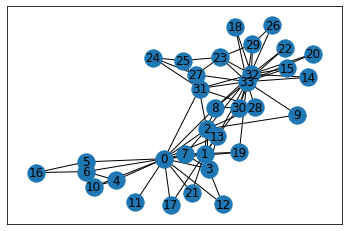

In [12]:
nx.draw_networkx(g)

In [7]:
# Prepare node positions for output
positions = force_atlas2_layout(g,
                                iterations=1000,
                                pos_list=None,
                                node_masses=None,
                                outbound_attraction_distribution=False,
                                lin_log_mode=False,
                                prevent_overlapping=False,
                                edge_weight_influence=1.0,

                                jitter_tolerance=1.0,
                                barnes_hut_optimize=True,
                                barnes_hut_theta=0.5,

                                scaling_ratio=2.0,
                                strong_gravity_mode=False,
                                multithread=False,
                                gravity=1.0)


In [8]:
# Model selection
model = ep.SIRModel(g)


In [9]:
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('gamma', 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)


In [10]:
number_of_iteration = 10
# Simulation execution
iterations = model.iteration_bunch(number_of_iteration)


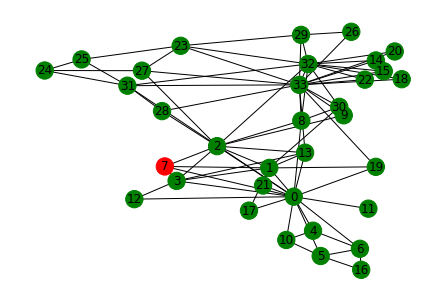

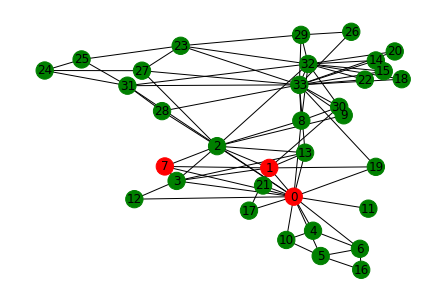

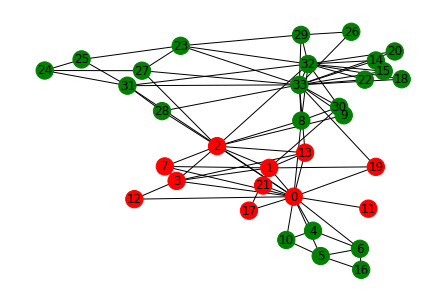

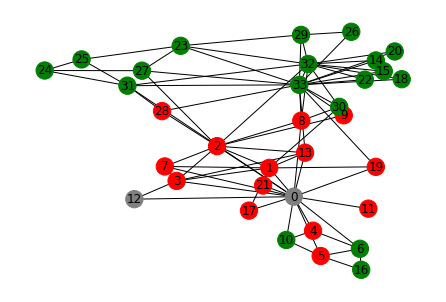

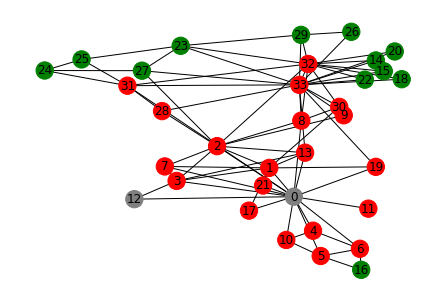

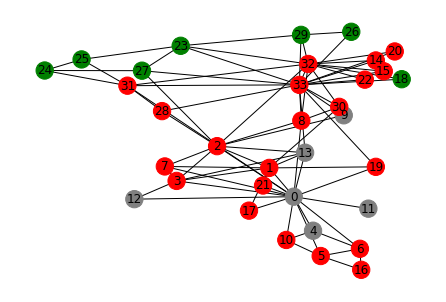

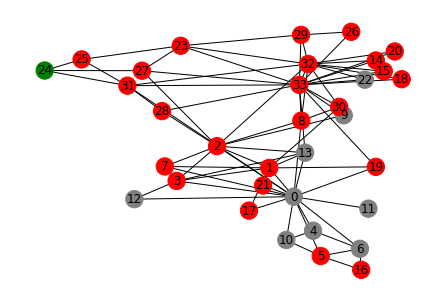

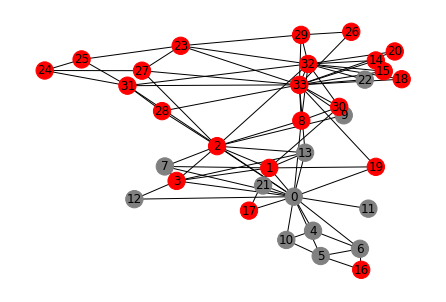

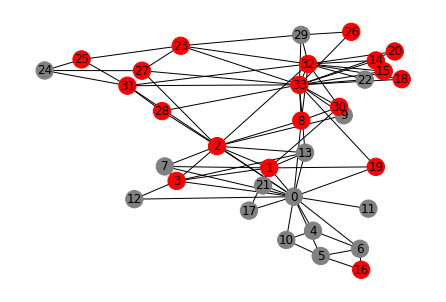

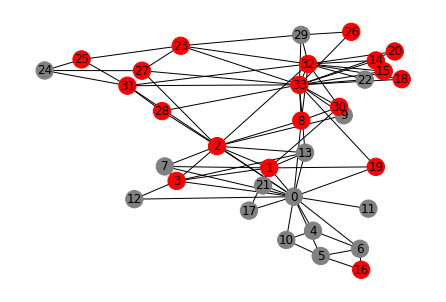

In [11]:
color_map = []
for iteration in range(g.number_of_nodes()):
    color_map.append('green')

for iteration in iterations:
    for index, status in iteration['status'].items():
        if status == 1:
            color_map[index] = 'red'
        if status == 2:
            color_map[index] = 'grey'

    nx.draw(g, positions, node_color=color_map, with_labels=True)
    plt.show()